# **Micro-Credit Defaulter Model**

Problem Statement: 
The Client is collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah).

In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers.  

This is to Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# from google.colab import drive
# drive.mount("/content/drive/")

In [3]:
import io

In [4]:
train_df = pd.read_csv("micro.csv")

In [6]:
train_df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 37 columns]

In [7]:
train_df = train_df.iloc[:,1:]

In [8]:
train_df.rename(columns={"label":"default", "msisdn":"phone_number","aon":"day_as_customer", "daily_decr30":"daily_avg30",
                         "daily_decr90":"daily_avg90", "rental30": "avg_main30", "rental90":"avg_main90"
                         }, inplace=True)

In [9]:
train_df.isnull().sum()

default                 0
phone_number            0
day_as_customer         0
daily_avg30             0
daily_avg90             0
avg_main30              0
avg_main90              0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [10]:
train_df.shape

(209593, 36)

In [11]:
#No null values

In [12]:
train_df.dtypes

default                   int64
phone_number             object
day_as_customer         float64
daily_avg30             float64
daily_avg90             float64
avg_main30              float64
avg_main90              float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

In [13]:
train_df.pcircle.nunique()

1

In [14]:
#since there is only one value in pcircle, we can drop that column

In [15]:
train_df.drop('pcircle', inplace=True, axis=1)

In [16]:
#methods for extracting day and month from given string date column
from datetime import datetime

#extract the day from date
def seperate_day(date_str):
    date_object = datetime.strptime(date_str, '%Y-%m-%d').date()
    return date_object.day
    
#extract the month from date
def seperate_month(date_str):
    date_object = datetime.strptime(date_str, '%Y-%m-%d').date()
    return date_object.month

In [17]:
#Extract month and day as seperate column
# train_df["pmonth"] = train_df["pdate"].apply(seperate_month)
# train_df["pday"] = train_df["pdate"].apply(seperate_day)
#Drop the pdate column
train_df.drop('pdate', inplace=True, axis=1)
#Since phone number is assigned by company itself and phone number has nothing to do with credit repay, we can drop that column
train_df.drop('phone_number', inplace=True, axis=1)

In [18]:
train_df.dtypes

default                   int64
day_as_customer         float64
daily_avg30             float64
daily_avg90             float64
avg_main30              float64
avg_main90              float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

[Text(0, 0, 'default'),
 Text(0, 0, 'day_as_customer'),
 Text(0, 0, 'daily_avg30'),
 Text(0, 0, 'daily_avg90'),
 Text(0, 0, 'avg_main30'),
 Text(0, 0, 'avg_main90'),
 Text(0, 0, 'last_rech_date_ma'),
 Text(0, 0, 'last_rech_date_da'),
 Text(0, 0, 'last_rech_amt_ma'),
 Text(0, 0, 'cnt_ma_rech30'),
 Text(0, 0, 'fr_ma_rech30'),
 Text(0, 0, 'sumamnt_ma_rech30'),
 Text(0, 0, 'medianamnt_ma_rech30'),
 Text(0, 0, 'medianmarechprebal30'),
 Text(0, 0, 'cnt_ma_rech90'),
 Text(0, 0, 'fr_ma_rech90'),
 Text(0, 0, 'sumamnt_ma_rech90'),
 Text(0, 0, 'medianamnt_ma_rech90'),
 Text(0, 0, 'medianmarechprebal90'),
 Text(0, 0, 'cnt_da_rech30'),
 Text(0, 0, 'fr_da_rech30'),
 Text(0, 0, 'cnt_da_rech90'),
 Text(0, 0, 'fr_da_rech90'),
 Text(0, 0, 'cnt_loans30'),
 Text(0, 0, 'amnt_loans30'),
 Text(0, 0, 'maxamnt_loans30'),
 Text(0, 0, 'medianamnt_loans30'),
 Text(0, 0, 'cnt_loans90'),
 Text(0, 0, 'amnt_loans90'),
 Text(0, 0, 'maxamnt_loans90'),
 Text(0, 0, 'medianamnt_loans90'),
 Text(0, 0, 'payback30'),
 Text(0

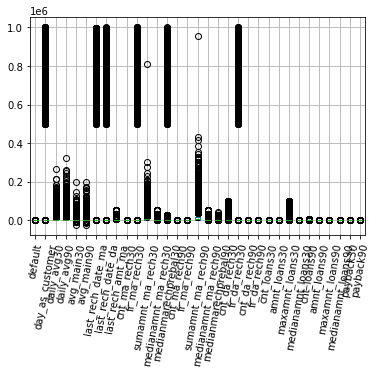

In [19]:
chart = train_df.boxplot()
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)

In [20]:
#There are outliers in almost all columns. Since a large amount of outliers are in the data set, it might be geniune values
# and we have not to loss more than 7-8% we keep the data

In [21]:
train_df.head(10)

default  day_as_customer   daily_avg30   daily_avg90  avg_main30  \
0        0            272.0   3055.050000   3065.150000      220.13   
1        1            712.0  12122.000000  12124.750000     3691.26   
2        1            535.0   1398.000000   1398.000000      900.13   
3        1            241.0     21.228000     21.228000      159.42   
4        1            947.0    150.619333    150.619333     1098.90   
5        1            568.0   2257.362667   2261.460000      368.13   
6        1            545.0   2876.641667   2883.970000      335.75   
7        1            768.0  12905.000000  17804.150000      900.35   
8        1           1191.0     90.695000     90.695000     2287.50   
9        1            536.0     29.357333     29.357333      612.96   

   avg_main90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
0      260.13                2.0                0.0              1539   
1     3691.26               20.0                0.0              5787   
2      900.13                3.0                0.0              1539   
3      159.42               41.0                0.0               947   
4     1098.90                4.0                0.0              2309   
5      380.13                2.0                0.0              1539   
6      402.90               13.0                0.0              5787   
7     2549.11                4.0               55.0              3178   
8     2287.50                1.0                0.0              1539   
9      612.96               11.0                0.0               773   

   cnt_ma_rech30  ...  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              2  ...            2            12              6.0   
1              1  ...            1            12             12.0   
2              1  ...            1             6              6.0   
3              0  ...            2            12              6.0   
4              7  ...            7            42              6.0   
5              4  ...            3            18              6.0   
6              1  ...            1             6              6.0   
7              3  ...            3            18              6.0   
8              4  ...            4            24              6.0   
9              1  ...            1             6              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   
5                 0.0          3.0            18                6   
6                 0.0          1.0             6                6   
7                 0.0          7.0            42                6   
8                 0.0          4.0            24                6   
9                 0.0          1.0             6                6   

   medianamnt_loans90  payback30  payback90  
0                 0.0  29.000000  29.000000  
1                 0.0   0.000000   0.000000  
2                 0.0   0.000000   0.000000  
3                 0.0   0.000000   0.000000  
4                 0.0   2.333333   2.333333  
5                 0.0  11.000000   8.333333  
6                 0.0   0.000000   0.000000  
7                 0.0   6.000000   3.857143  
8                 0.0   2.666667   2.666667  
9                 0.0   0.000000   0.000000  

[10 rows x 33 columns]

In [22]:
train_df[train_df.payback30 == 0]

default  day_as_customer   daily_avg30   daily_avg90  avg_main30  \
1             1            712.0  12122.000000  12124.750000     3691.26   
2             1            535.0   1398.000000   1398.000000      900.13   
3             1            241.0     21.228000     21.228000      159.42   
6             1            545.0   2876.641667   2883.970000      335.75   
9             1            536.0     29.357333     29.357333      612.96   
...         ...              ...           ...           ...         ...   
209583        1            935.0     15.550667     15.550667      140.44   
209584        0            945.0      0.000000      0.000000       78.30   
209587        1            239.0  14678.000000  14704.900000    12935.26   
209591        1           1732.0  12488.228333  12574.370000      411.83   
209592        1           1581.0   4489.362000   4534.820000      483.92   

        avg_main90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
1          3691.26               20.0                0.0              5787   
2           900.13                3.0                0.0              1539   
3           159.42               41.0                0.0               947   
6           402.90               13.0                0.0              5787   
9           612.96               11.0                0.0               773   
...            ...                ...                ...               ...   
209583      140.44                4.0                0.0              1547   
209584       78.30                0.0                0.0                 0   
209587    16775.60                8.0                0.0              3178   
209591      984.58                2.0               38.0               773   
209592      631.20               13.0                0.0              7526   

        cnt_ma_rech30  ...  cnt_loans30  amnt_loans30  maxamnt_loans30  \
1                   1  ...            1            12             12.0   
2                   1  ...            1             6              6.0   
3                   0  ...            2            12              6.0   
6                   1  ...            1             6              6.0   
9                   1  ...            1             6              6.0   
...               ...  ...          ...           ...              ...   
209583              3  ...            1             6              6.0   
209584              0  ...            1             6              6.0   
209587              3  ...            1            12             12.0   
209591              5  ...            2            18             12.0   
209592              2  ...            2            18             12.0   

        medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
1                      0.0          1.0            12               12   
2                      0.0          1.0             6                6   
3                      0.0          2.0            12                6   
6                      0.0          1.0             6                6   
9                      0.0          1.0             6                6   
...                    ...          ...           ...              ...   
209583                 0.0          1.0             6                6   
209584                 0.0          1.0             6                6   
209587                 1.0          3.0            24               12   
209591                 0.0          3.0            24               12   
209592                 0.0          2.0            18               12   

        medianamnt_loans90  payback30  payback90  
1                      0.0        0.0        0.0  
2                      0.0        0.0        0.0  
3                      0.0        0.0        0.0  
6                      0.0        0.0        0.0  
9                      0.0        0.0        0.0  
...                    ...        ...        ...  
209583                 

In [23]:
print(train_df[train_df.payback30 == 0].shape)
print(train_df[train_df.payback90 == 0].shape)

(106712, 33)
(95699, 33)


In [24]:
#Around one lack of record has no loan history

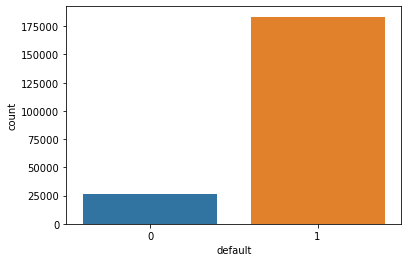

In [25]:
sns.countplot(train_df.default)

In [26]:
#Data is imbalanced. Only around 12.5% is non default data. So there is  chance of biasing the model towards default

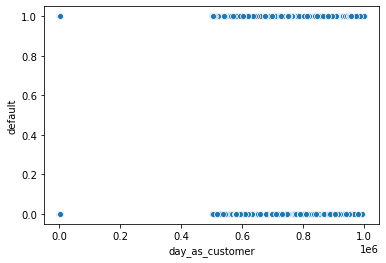

In [27]:
chart = sns.scatterplot( train_df.day_as_customer,train_df.default )

In [28]:
train_df.day_as_customer.max()

999860.755167902

In [29]:
train_df.day_as_customer.min()

-48.0

In [30]:
#The column aon(day as  a customer) seems to be wrong. because the maximum value is around 9 lack which means 2700 years
#minimum is -48. This data makes no sense. Most of the values in this column are like this. So we want to drop
#this column
train_df.drop("day_as_customer", axis=1, inplace=True)

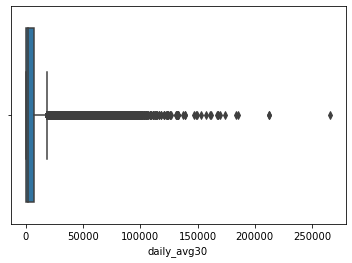

In [31]:
# cuurency rate 1 idr = around 198 inr in 2016(to get a better understanding of the amount)
sns.boxplot(train_df.daily_avg30)

In [32]:
print(train_df.daily_avg30.median())
print(train_df.daily_avg30.median())
print(train_df.daily_avg30.quantile(0))
print(train_df.daily_avg30.quantile(.5))
print(train_df.daily_avg30.quantile(1))
print(train_df.daily_avg30.min())
print(train_df.daily_avg30.max())

1469.17566666667
1469.17566666667
-93.0126666666667
1469.17566666667
265926.0
-93.0126666666667
265926.0


In [33]:
train_df[train_df.daily_avg30 < 0]

default  daily_avg30  daily_avg90  avg_main30  avg_main90  \
74            0    -2.166667    -2.166667      135.72      135.72   
78            0    -0.250000    -0.250000        0.00        0.00   
96            0    -0.900000    -0.900000      140.94      140.94   
109           0    -0.400000    -0.400000        0.00        0.00   
273           0    -0.481667    -0.481667     1153.11     1153.11   
...         ...          ...          ...         ...         ...   
209223        1    -0.825000    -0.825000       45.00       45.00   
209255        0    -5.000000    -5.000000    12208.50    12208.50   
209287        0    -0.180000    -0.180000     1127.52     1127.52   
209426        0    -0.331333    -0.331333      426.16      426.16   
209512        0    -0.500000    -0.500000        0.00        0.00   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
74                    0.0                0.0                 0              0   
78                    0.0                0.0                 0              0   
96                    0.0                0.0                 0              0   
109                   0.0                0.0                 0              0   
273                   0.0                0.0                 0              0   
...                   ...                ...               ...            ...   
209223                1.0                0.0              7526              1   
209255                0.0                0.0                 0              0   
209287                0.0                0.0                 0              0   
209426                0.0                0.0                 0              0   
209512               50.0                0.0               773              0   

        fr_ma_rech30  ...  cnt_loans30  amnt_loans30  maxamnt_loans30  \
74               0.0  ...            1             6              6.0   
78               0.0  ...            1             6              6.0   
96               0.0  ...            1             6              6.0   
109              0.0  ...            1             6              6.0   
273              0.0  ...            1             6              6.0   
...              ...  ...          ...           ...              ...   
209223           0.0  ...            1             6              6.0   
209255           0.0  ...            1             6              6.0   
209287           0.0  ...            1             6              6.0   
209426           0.0  ...            1             6              6.0   
209512           0.0  ...            1             6              6.0   

        medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
74                     0.0          1.0             6                6   
78                     0.0          1.0             6                6   
96                     0.0          1.0             6                6   
109                    0.0          1.0             6                6   
273                    0.0          1.0             6                6   
...                    ...          ...           ...              ...   
209223                 0.0          1.0             6                6   
209255                 0.0          1.0             6                6   
209287                 0.0          1.0             6                6   
209426                 0.0          1.0             6                6   
209512                 0.0          1.0             6                6   

        medianamnt_loans90  payback30  payback90  
74                     0.0        0.0        0.0  
78                     0.0        0.0        0.0  
96                     0.0        0.0        0.0  
109                    0.0        0.0        0.0  
273                    0.0        0.0        0.0  
...                    ...        ...        ...  
209223                 0.0        0.0        0.0  
209255                 0.0      

In [34]:
#There are a lot of records with -ve averages.

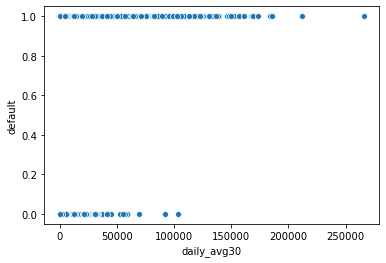

In [35]:
sns.scatterplot(train_df.daily_avg30, train_df.default)

In [36]:
#The persons who spented more than 10000 idr avg in a month was  defaulters only

In [37]:
print(train_df.daily_avg90.median())
print(train_df.daily_avg90.median())
print(train_df.daily_avg90.quantile(0))
print(train_df.daily_avg90.quantile(.5))
print(train_df.daily_avg90.quantile(1))
print(train_df.daily_avg90.min())
print(train_df.daily_avg90.max())

1500.0
1500.0
-93.0126666666667
1500.0
320630.0
-93.0126666666667
320630.0


In [38]:
#in avg30 and 90 we can see that there are -ve values in average. Consider these -ve values as unused balance
#eg: if a person recharged the phone with idr 100 and did not make a call in last 30 days, the person's daily_avg_30 will be -100

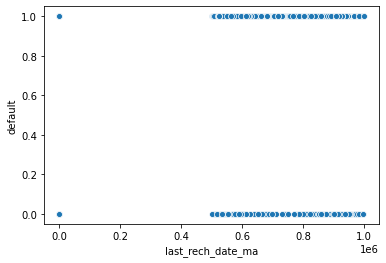

In [39]:
sns.scatterplot(train_df.last_rech_date_ma, train_df.default)

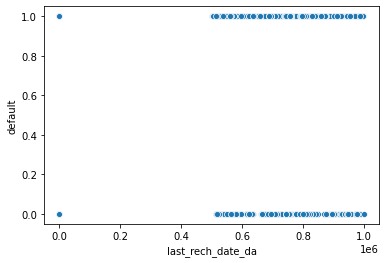

In [40]:
sns.scatterplot(x = train_df.last_rech_date_da, y = train_df.default)

In [41]:
# default is not dependant of the last recharged day of main and data account

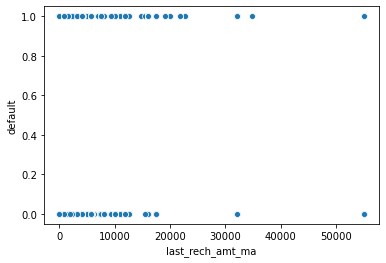

In [42]:
sns.scatterplot(x = train_df.last_rech_amt_ma, y = train_df.default)

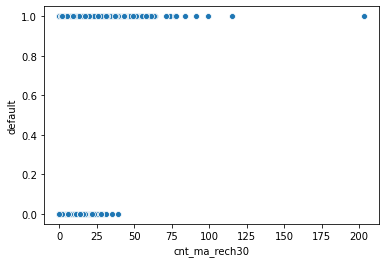

In [43]:
sns.scatterplot(x = train_df.cnt_ma_rech30, y = train_df.default)

In [44]:
#The persons who are defaulters have a chance to recharge more times

In [45]:
train_df.head()

default   daily_avg30   daily_avg90  avg_main30  avg_main90  \
0        0   3055.050000   3065.150000      220.13      260.13   
1        1  12122.000000  12124.750000     3691.26     3691.26   
2        1   1398.000000   1398.000000      900.13      900.13   
3        1     21.228000     21.228000      159.42      159.42   
4        1    150.619333    150.619333     1098.90     1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                2.0                0.0              1539              2   
1               20.0                0.0              5787              1   
2                3.0                0.0              1539              1   
3               41.0                0.0               947              0   
4                4.0                0.0              2309              7   

   fr_ma_rech30  ...  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0          21.0  ...            2            12              6.0   
1           0.0  ...            1            12             12.0   
2           0.0  ...            1             6              6.0   
3           0.0  ...            2            12              6.0   
4           2.0  ...            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90  
0                 0.0  29.000000  29.000000  
1                 0.0   0.000000   0.000000  
2                 0.0   0.000000   0.000000  
3                 0.0   0.000000   0.000000  
4                 0.0   2.333333   2.333333  

[5 rows x 32 columns]

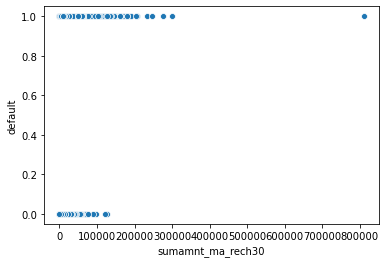

In [46]:
sns.scatterplot(x = train_df.sumamnt_ma_rech30, y = train_df.default)

In [47]:
#on the previous plot number of rechrges was higher in defaulters than non defaulters. 
#When no. of recharges increases, total sum of recharges also increases
#So sum of recharges will be high for defaulters 

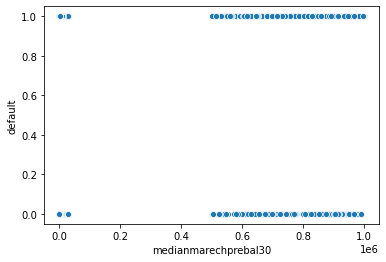

In [48]:
sns.scatterplot(x = train_df.medianmarechprebal30, y = train_df.default)

In [49]:
#No effect on default

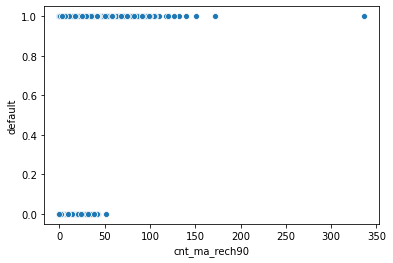

In [50]:
sns.scatterplot(x = train_df.cnt_ma_rech90, y = train_df.default)

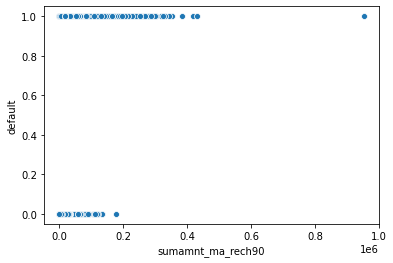

In [51]:
sns.scatterplot(x = train_df.sumamnt_ma_rech90, y = train_df.default)

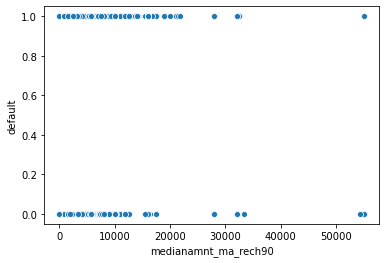

In [52]:
sns.scatterplot(x = train_df.medianamnt_ma_rech90, y = train_df.default)

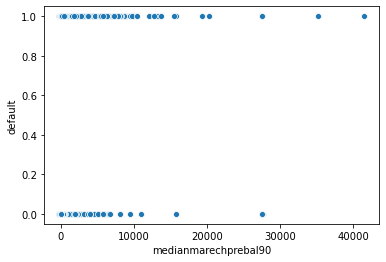

In [53]:
sns.scatterplot(x = train_df.medianmarechprebal90, y = train_df.default)

In [54]:
train_df.head()

default   daily_avg30   daily_avg90  avg_main30  avg_main90  \
0        0   3055.050000   3065.150000      220.13      260.13   
1        1  12122.000000  12124.750000     3691.26     3691.26   
2        1   1398.000000   1398.000000      900.13      900.13   
3        1     21.228000     21.228000      159.42      159.42   
4        1    150.619333    150.619333     1098.90     1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                2.0                0.0              1539              2   
1               20.0                0.0              5787              1   
2                3.0                0.0              1539              1   
3               41.0                0.0               947              0   
4                4.0                0.0              2309              7   

   fr_ma_rech30  ...  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0          21.0  ...            2            12              6.0   
1           0.0  ...            1            12             12.0   
2           0.0  ...            1             6              6.0   
3           0.0  ...            2            12              6.0   
4           2.0  ...            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90  
0                 0.0  29.000000  29.000000  
1                 0.0   0.000000   0.000000  
2                 0.0   0.000000   0.000000  
3                 0.0   0.000000   0.000000  
4                 0.0   2.333333   2.333333  

[5 rows x 32 columns]

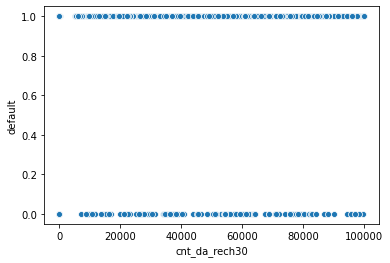

In [55]:
sns.scatterplot(x = train_df.cnt_da_rech30, y = train_df.default)

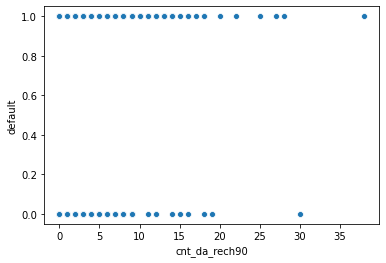

In [56]:
sns.scatterplot(x = train_df.cnt_da_rech90, y = train_df.default)

In [57]:
train_df.head()

default   daily_avg30   daily_avg90  avg_main30  avg_main90  \
0        0   3055.050000   3065.150000      220.13      260.13   
1        1  12122.000000  12124.750000     3691.26     3691.26   
2        1   1398.000000   1398.000000      900.13      900.13   
3        1     21.228000     21.228000      159.42      159.42   
4        1    150.619333    150.619333     1098.90     1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                2.0                0.0              1539              2   
1               20.0                0.0              5787              1   
2                3.0                0.0              1539              1   
3               41.0                0.0               947              0   
4                4.0                0.0              2309              7   

   fr_ma_rech30  ...  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0          21.0  ...            2            12              6.0   
1           0.0  ...            1            12             12.0   
2           0.0  ...            1             6              6.0   
3           0.0  ...            2            12              6.0   
4           2.0  ...            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90  
0                 0.0  29.000000  29.000000  
1                 0.0   0.000000   0.000000  
2                 0.0   0.000000   0.000000  
3                 0.0   0.000000   0.000000  
4                 0.0   2.333333   2.333333  

[5 rows x 32 columns]

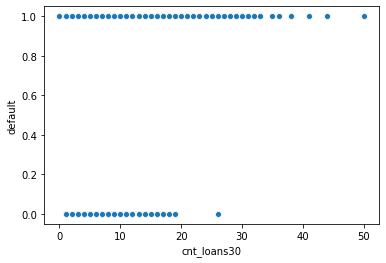

In [58]:
sns.scatterplot(x = train_df.cnt_loans30, y = train_df.default)

In [59]:
#The persons who take more loans have a chance to be a defaulter

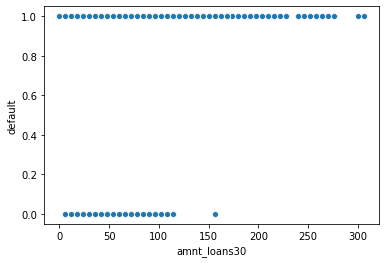

In [60]:
sns.scatterplot(x = train_df.amnt_loans30	, y = train_df.default)

In [61]:
#obviously when no. of count of loan increases, amount also increases 

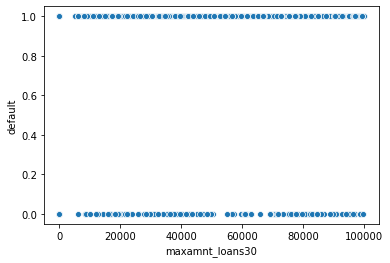

In [62]:
sns.scatterplot(x = train_df.maxamnt_loans30	, y = train_df.default)

In [63]:
train_df[train_df.maxamnt_loans30 > 12].shape

(1047, 32)

In [64]:
#The maximum amount should be 6 or 12. There are around 1000 rows which have higher value than 12. So we can drop that values

In [65]:
train_df = train_df[train_df.maxamnt_loans30 <= 12]

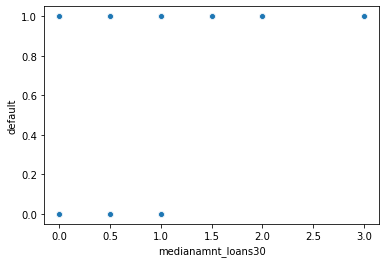

In [66]:
sns.scatterplot(x = train_df.medianamnt_loans30	, y = train_df.default)

In [67]:
train_df.head()

default   daily_avg30   daily_avg90  avg_main30  avg_main90  \
0        0   3055.050000   3065.150000      220.13      260.13   
1        1  12122.000000  12124.750000     3691.26     3691.26   
2        1   1398.000000   1398.000000      900.13      900.13   
3        1     21.228000     21.228000      159.42      159.42   
4        1    150.619333    150.619333     1098.90     1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                2.0                0.0              1539              2   
1               20.0                0.0              5787              1   
2                3.0                0.0              1539              1   
3               41.0                0.0               947              0   
4                4.0                0.0              2309              7   

   fr_ma_rech30  ...  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0          21.0  ...            2            12              6.0   
1           0.0  ...            1            12             12.0   
2           0.0  ...            1             6              6.0   
3           0.0  ...            2            12              6.0   
4           2.0  ...            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90  
0                 0.0  29.000000  29.000000  
1                 0.0   0.000000   0.000000  
2                 0.0   0.000000   0.000000  
3                 0.0   0.000000   0.000000  
4                 0.0   2.333333   2.333333  

[5 rows x 32 columns]

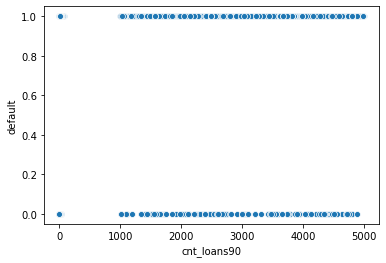

In [68]:
sns.scatterplot(x = train_df.cnt_loans90	, y = train_df.default)

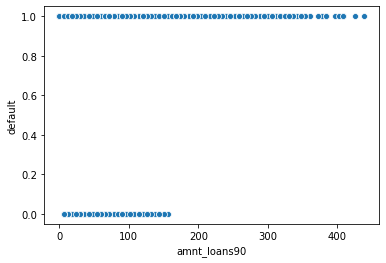

In [69]:
sns.scatterplot(x = train_df.amnt_loans90	, y = train_df.default)

In [70]:
train_df.shape

(208546, 32)

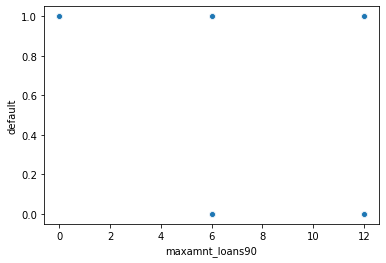

In [71]:
sns.scatterplot(x = train_df.maxamnt_loans90	, y = train_df.default)

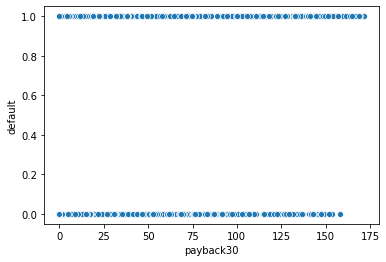

In [72]:
sns.scatterplot(x = train_df.payback30	, y = train_df.default)

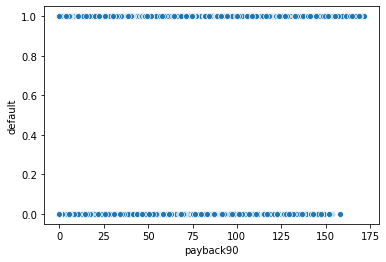

In [73]:
sns.scatterplot(x = train_df.payback90	, y = train_df.default)

In [74]:
corr = train_df.corr()

In [75]:
corr

default  daily_avg30  daily_avg90  avg_main30  \
default               1.000000     0.168217     0.166077    0.057973   
daily_avg30           0.168217     1.000000     0.977673    0.441888   
daily_avg90           0.166077     0.977673     1.000000    0.434495   
avg_main30            0.057973     0.441888     0.434495    1.000000   
avg_main90            0.075421     0.458730     0.471477    0.955230   
last_rech_date_ma     0.003759     0.000379     0.000843   -0.001039   
last_rech_date_da     0.001874    -0.001540    -0.001790    0.003391   
last_rech_amt_ma      0.131552     0.275909     0.264199    0.127314   
cnt_ma_rech30         0.237201     0.451438     0.426739    0.233137   
fr_ma_rech30          0.001237    -0.000685    -0.000458   -0.001239   
sumamnt_ma_rech30     0.202617     0.636788     0.604134    0.272670   
medianamnt_ma_rech30  0.141191     0.295410     0.283012    0.129991   
medianmarechprebal30 -0.004689    -0.001043    -0.000635   -0.001418   
cnt_ma_rech90         0.236295     0.587463     0.593205    0.311941   
fr_ma_rech90          0.084369    -0.078325    -0.079551   -0.033582   
sumamnt_ma_rech90     0.205624     0.763154     0.769086    0.342296   
medianamnt_ma_rech90  0.120658     0.257925     0.250611    0.110512   
medianmarechprebal90  0.039173     0.037479     0.036398    0.027170   
cnt_da_rech30         0.004016     0.000763     0.000721   -0.001154   
fr_da_rech30          0.000027    -0.001284    -0.001365   -0.002475   
cnt_da_rech90         0.002911     0.038843     0.031175    0.072281   
fr_da_rech90         -0.005501     0.020720     0.016482    0.046713   
cnt_loans30           0.196170     0.366500     0.340787    0.180130   
amnt_loans30          0.197150     0.471860     0.448262    0.233307   
maxamnt_loans30       0.074167     0.381003     0.374448    0.218354   
medianamnt_loans30    0.044536    -0.011765    -0.005794   -0.016308   
cnt_loans90           0.004818     0.009043     0.009552    0.004007   
amnt_loans90          0.199648     0.563801     0.567559    0.298752   
maxamnt_loans90       0.084053     0.400102     0.397173    0.234048   
medianamnt_loans90    0.035670    -0.037516    -0.034921   -0.035391   
payback30             0.048238     0.026817     0.019301    0.072912   
payback90             0.049131     0.047039     0.040647    0.094912   

                      avg_main90  last_rech_date_ma  last_rech_date_da  \
default                 0.075421           0.003759           0.001874   
daily_avg30             0.458730           0.000379          -0.001540   
daily_avg90             0.471477           0.000843          -0.001790   
avg_main30              0.955230          -0.001039           0.003391   
avg_main90              1.000000          -0.001644           0.002925   
last_rech_date_ma      -0.001644           1.000000           0.001821   
last_rech_date_da       0.002925           0.001821           1.000000   
last_rech_amt_ma        0.121523           0.000028          -0.000015   
cnt_ma_rech30           0.230046           0.004238           0.001741   
fr_ma_rech30           -0.000588          -0.001615           0.001175   
sumamnt_ma_rech30       0.259666           0.001896           0.000230   
medianamnt_ma_rech30    0.120359          -0.001186           0.001178   
medianmarechprebal30   -0.001229           0.004113           0.002874   
cnt_ma_rech90           0.345096           0.004076           0.001454   
fr_ma_rech90           -0.036549           0.001594           0.000569   
sumamnt_ma_rech90       0.360576           0.002038          -0.000242   
medianamnt_ma_rech90    0.103315          -0.000581           0.000363   
medianmarechprebal90    0.029594          -0.001043           0.004212   
cnt_da_rech30          -0.000585          -0.003461          -0.003627   
fr_da_rech30           -0.002261          -0.003614          -0.000049   
cnt_da_rech90           0.056296          -0.003520          -0.001969   
fr_da_rech90      

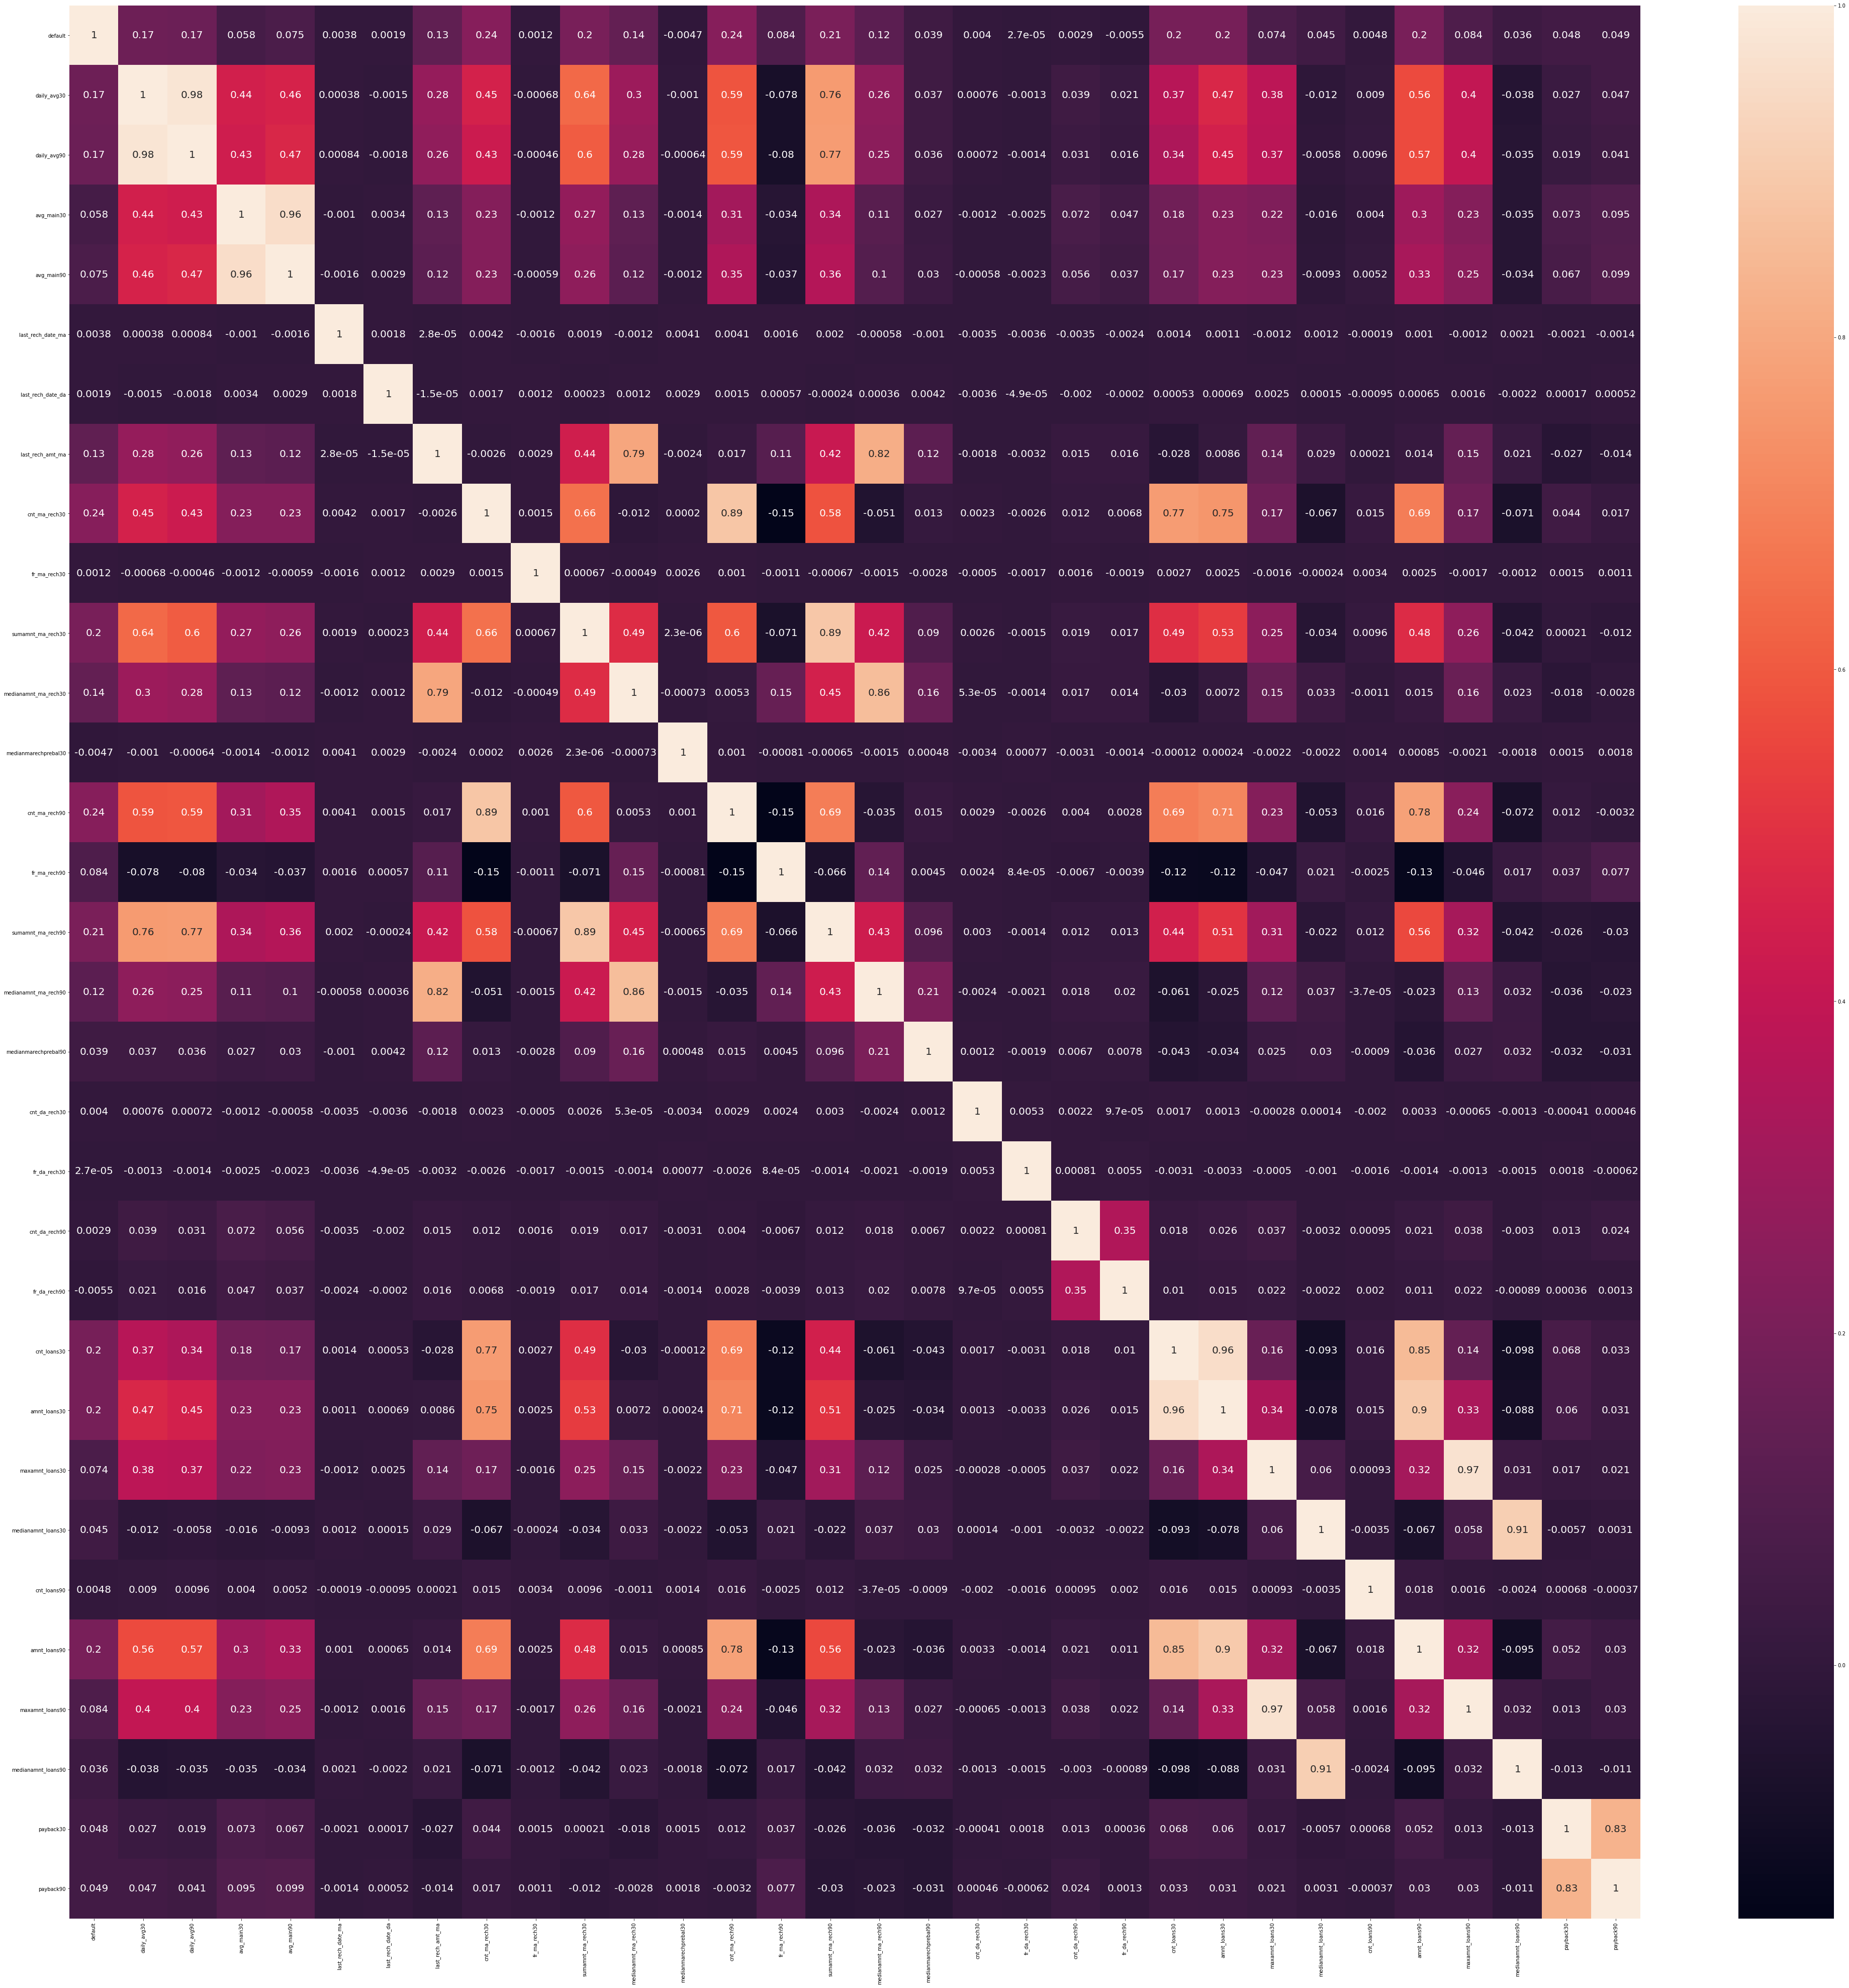

In [76]:
plt.figure(figsize=(70,70))
sns.heatmap(corr, annot=True, annot_kws={"fontsize":20})

In [77]:
x = train_df.iloc[:,1:]
y = train_df.iloc[:,0]

In [78]:
x

daily_avg30   daily_avg90  avg_main30  avg_main90  last_rech_date_ma  \
0        3055.050000   3065.150000      220.13      260.13                2.0   
1       12122.000000  12124.750000     3691.26     3691.26               20.0   
2        1398.000000   1398.000000      900.13      900.13                3.0   
3          21.228000     21.228000      159.42      159.42               41.0   
4         150.619333    150.619333     1098.90     1098.90                4.0   
...              ...           ...         ...         ...                ...   
209588    151.872333    151.872333     1089.19     1089.19                1.0   
209589     36.936000     36.936000     1728.36     1728.36                4.0   
209590  11843.111667  11904.350000     5861.83     8893.20                3.0   
209591  12488.228333  12574.370000      411.83      984.58                2.0   
209592   4489.362000   4534.820000      483.92      631.20               13.0   

        last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  \
0                     0.0              1539              2          21.0   
1                     0.0              5787              1           0.0   
2                     0.0              1539              1           0.0   
3                     0.0               947              0           0.0   
4                     0.0              2309              7           2.0   
...                   ...               ...            ...           ...   
209588                0.0              4048              3           2.0   
209589                0.0               773              4           1.0   
209590                0.0              1539              5           8.0   
209591               38.0               773              5           4.0   
209592                0.0              7526              2           1.0   

        sumamnt_ma_rech30  ...  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0                  3078.0  ...            2            12              6.0   
1                  5787.0  ...            1            12             12.0   
2                  1539.0  ...            1             6              6.0   
3                     0.0  ...            2            12              6.0   
4                 20029.0  ...            7            42              6.0   
...                   ...  ...          ...           ...              ...   
209588            10404.0  ...            2            12              6.0   
209589             3092.0  ...            3            18              6.0   
209590             9334.0  ...            4            42             12.0   
209591            12154.0  ...            2            18             12.0   
209592             9065.0  ...            2            18             12.0   

        medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                      0.0          2.0            12                6   
1                      0.0          1.0            12               12   
2                      0.0          1.0             6                6   
3                      0.0          2.0            12                6   
4                      0.0          7.0            42                6   
...                    ...          ...           ...              ...   
209588                 0.0          2.0            12                6   
209589                 0.0          3.0            18                6   
209590                 0.0          6.0            54               12   
209591                 0.0          3.0            24               12   
209592                 0.0          2.0            18               12   

        medianamnt_loans90  payback30  payback90  
0                      0.0  29.000000  29.000000  
1                      0.0   0.000000   0.000000  
2                      0.0   0.000000   0.000000  
3                      0.0   0.000000   0.000000  
4                      0.0   2.333333   2.

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [80]:
#finding best random state
# max_acc = 0
# max_rs = 0
# for i in range(1,200):
#     x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .22, random_state = i)
#     lr = LogisticRegression()
#     lr.fit(x_train, y_train)
#     pred = lr.predict(x_test)
#     acc = accuracy_score(y_test, pred)
#     if acc > max_acc:
#         max_acc = acc
#         max_rs = i
# print("Best random state=",max_rs)

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .22, random_state = 72)

In [85]:
models = {"SVC":SVC(),"KNN":KNeighborsClassifier(), "RandomForest":RandomForestClassifier(),
          "LogisticRegression":LogisticRegression(), "naive":GaussianNB() }
acc = {}
mod_list = []
for i in models:
    mod = i
    mod = models[i]
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    sc = accuracy_score(y_test,pred)
    acc[i] = sc
    mod_list.append(mod)
print(acc)

{'SVC': 0.8785553933000588, 'KNN': 0.8973213312700247, 'RandomForest': 0.913624376103398, 'LogisticRegression': 0.8728885595344478, 'naive': 0.5449096575924675}


In [86]:
#applying cross validation
from sklearn.model_selection import cross_val_score

In [87]:
cv_list = {}
for i in mod_list:
    cv = cross_val_score(i, x, y, cv=5)
    cv_list[str(i)] = cv.mean()
print(cv_list)

{'SVC()': 0.8751690274912768, 'KNeighborsClassifier()': 0.8944933009294875, 'RandomForestClassifier()': 0.912302325828567, 'LogisticRegression()': 0.8685038278740065, 'GaussianNB()': 0.5473804443120218}


In [88]:
#KNN is the best algorithm here

In [89]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [90]:
parameters = {'leaf_size': list(range(1,50)),  
              'n_neighbors': list(range(1,30)), 
              'p': [1,2]}

In [91]:
GCV = GridSearchCV(KNeighborsClassifier(), parameters, cv=5)

In [ ]:
GCV.fit(x_train, y_train)

In [ ]:
GCV.best_params_

In [ ]:
GCV_predict = GCV.best_estimator_.predict(x_test)

In [ ]:
accuracy_score(y_test, GCV_predict)

In [ ]:
#saving model
import joblib
joblib.dump(GCV.best_estimator_, "MicroCredit.obj")